In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics


C:\Users\Prashant Dodiya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#feeding data
dt = pd.read_excel("CTG.xls", 'Raw Data')
print(dt.shape)
dt.head()

(2130, 40)


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [3]:
#dropping useless columns and rows
dataset = dt.drop(columns=['FileName', 'SegFile', 'Date'])
f_data = dataset.dropna()
f_data.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [4]:
#checking if null values are left out
f_data.isnull().sum()

b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

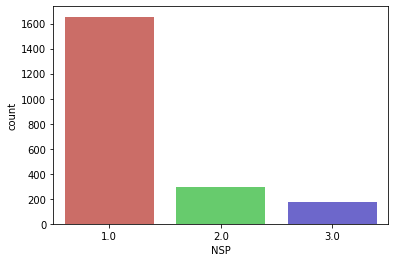

In [5]:
#plotting the count of NSP
sns.countplot(x = 'NSP', data = f_data , palette = 'hls')
plt.show()

In [6]:
# creating array
x = f_data[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV',
               'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min',
               'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 
               'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
               'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = f_data['NSP']

In [7]:
# splitting data into test-train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,
                                               random_state=0)

In [8]:
#fitting the model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Prashant Dodiya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prashant Dodiya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#making array of predicted values
y_pred=logreg.predict(x_test)

In [10]:
# forming confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

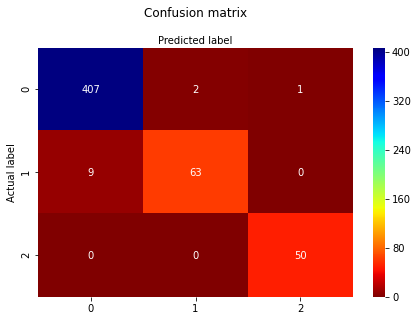

In [11]:
# visualizing the confusion matrix
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
# printing accuray and scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9774436090225563


In [13]:
# defining area under curve as there is no inbuilt function 
# using different average parameter
def multiclass_roc_auc_score(y_test, y_pred, average):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

# Weighted for each label and to find their average weighted by support 
auc1 = multiclass_roc_auc_score(y_test, y_pred, average= "weighted")
print("Area under curve 1: ", auc1)

# Macro for each label and to find their unweighted mean.
auc2 = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve 2: ", auc2)

# Micro for total true positives, false negatives and false positives.
auc3 = multiclass_roc_auc_score(y_test, y_pred, average="micro")
print("Area under curve 3: ", auc3)

Area under curve 1:  0.9599034966565422
Area under curve 2:  0.9645816533570587
Area under curve 3:  0.9830827067669173
